In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)

import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px

In [2]:

TagDesc = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\1 - EF - CSV Inputs\TagDesc.csv")
# df_CDCA = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-19-23\df_AlConCD554.csv")
df_CDCA1 = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDFII.csv")


FScore = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\FScore_on_Butanol_320.csv")

# df_CDCA = pd.read_csv('/workspaces/codespaces-jupyter/ProjectrC4/df_AlConCD554.csv')

# Check Basic Information:

In [3]:


df_CDCA1.info() #to check the data types, non-null counts, and memory usage.
df_CDCA1.head() #to examine the first few rows of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56692 entries, 0 to 56691
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Butanol   56692 non-null  float64
 1   425 %Al   56692 non-null  float64
 2   TC55552   56692 non-null  float64
 3   DI55102   56692 non-null  float64
 4   FC55569   56692 non-null  float64
 5   DI55152   56692 non-null  float64
 6   FC55576   56692 non-null  float64
 7   TI55017   56692 non-null  float64
 8   FC42428   56692 non-null  float64
 9   AYC55580  56692 non-null  float64
 10  LC55555   56692 non-null  float64
 11  TI55023   56692 non-null  float64
 12  FFC55553  56692 non-null  float64
 13  FC55555   56692 non-null  float64
 14  TI55021   56692 non-null  float64
 15  FYC55553  56692 non-null  float64
 16  FC55009   56692 non-null  float64
 17  LC55557   56692 non-null  float64
 18  TC55553   56692 non-null  float64
 19  DI55580   56692 non-null  float64
 20  LC55553   56692 non-null  fl

,Butanol,425 %Al,TC55552,DI55102,FC55569,DI55152,FC55576,TI55017,FC42428,AYC55580,LC55555,TI55023,FFC55553,FC55555,TI55021,FYC55553,FC55009,LC55557,TC55553,DI55580,LC55553,FC55003,FC55102,FFC55555,TC55555,Date,Decanol
0,58.5265,6.30693,177.188,0.969806,6912.68,0.924181,341.221,205.694,39317.7,18.2020,59.9547,211.484,1.000020,31160.5,213.032,41313.6,1518.05,65.8159,231.718,1.01691,62.1299,5017.59,54720.8,0.750930,180.140,2012-05-16 16:00:00,0.711118
1,54.8583,6.30763,177.188,0.970496,6918.11,0.925255,334.948,205.700,39979.0,18.2349,59.9688,211.346,0.996975,31166.9,212.861,41342.9,1528.01,65.8734,232.537,1.01733,61.5982,4919.29,54646.6,0.751501,180.125,2012-05-16 17:00:00,0.722511
2,47.5218,6.30904,177.313,0.969785,6921.81,0.923308,324.050,205.491,40392.9,18.3104,59.8958,210.831,1.000720,31123.6,212.537,41517.7,1527.23,65.7718,231.454,1.01852,62.0092,5159.60,55039.2,0.749676,179.981,2012-05-16 19:00:00,0.745297
3,43.8536,6.30974,177.750,0.971677,6909.54,0.922757,338.418,204.892,39405.8,18.3399,60.1427,211.151,0.998250,31152.9,213.069,41475.9,1495.65,66.2276,229.980,1.01856,61.8406,5726.97,54010.4,0.750338,179.899,2012-05-16 20:00:00,0.756689
4,40.1853,6.31044,177.585,0.969270,6924.42,0.925092,357.119,204.576,39867.5,18.4314,60.0564,210.879,1.005450,31088.2,212.732,41741.3,1512.24,65.9929,229.427,1.01950,62.0640,5591.42,54184.4,0.749787,180.038,2012-05-16 21:00:00,0.768082


# Summary Statistics:

In [4]:


df_CDCA1.describe() #to get summary statistics for numeric columns.


,Butanol,425 %Al,TC55552,DI55102,FC55569,DI55152,FC55576,TI55017,FC42428,AYC55580,LC55555,TI55023,FFC55553,FC55555,TI55021,FYC55553,FC55009,LC55557,TC55553,DI55580,LC55553,FC55003,FC55102,FFC55555,TC55555,Decanol
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,5.669200e+04,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000
mean,10.159097,6.102568,167.848708,0.929183,6542.683482,0.948213,423.616848,186.704144,34949.282507,11.190763,59.583652,218.923414,0.983235,27838.228893,223.571121,35311.748813,8.642095e+02,69.335227,182.968327,0.998448,63.743198,5943.587725,44454.232553,0.774375,181.033535,2.783139
std,10.766912,0.307167,15.014702,0.066439,380.329468,0.043248,260.435270,9.778964,5665.289174,4.140405,10.709861,4.063504,0.056070,3535.683915,9.366356,4632.175030,5.951287e+02,3.271572,27.965747,0.044181,6.403442,836.963231,6565.359850,0.021944,1.495460,1.600426
min,0.010000,4.573810,119.869000,0.794535,5096.080000,0.820425,0.000548,159.702000,14573.800000,0.000862,27.970000,206.472000,0.265390,14214.900000,206.365000,17321.200000,3.150000e-18,59.038000,110.534000,0.860904,43.548000,2925.430000,20039.100000,0.694477,175.746000,0.000976
25%,3.725195,5.969493,156.235000,0.889793,6295.522500,0.917749,244.604000,179.370000,31670.025000,9.382740,49.938100,215.731000,0.959998,26770.325000,217.963000,33117.150000,4.091148e+02,66.227375,162.691750,0.967603,61.246825,5425.580000,40968.975000,0.759903,179.971000,1.493330
50%,5.920780,6.120565,170.625000,0.938533,6529.010000,0.942326,379.134000,185.770500,37037.650000,10.709550,61.884700,218.255500,0.988710,28947.000000,221.217000,36832.650000,8.416325e+02,69.966300,177.601500,0.995945,65.277550,5963.340000,45941.200000,0.778141,180.142000,2.560000
75%,11.642100,6.267622,179.313000,0.979955,6767.337500,0.974824,617.744000,193.388250,39151.750000,12.928750,68.106400,221.765000,1.010652,30036.300000,225.275000,38552.225000,1.317453e+03,71.768800,202.014250,1.027960,67.964225,6506.837500,48822.325000,0.789695,182.027000,3.863330
max,60.346700,7.571230,207.426000,1.068230,8014.950000,1.065410,1206.820000,212.051000,49372.900000,23.835600,85.261600,232.208000,1.475490,34638.100000,260.685000,50427.700000,2.655410e+03,79.508200,261.360000,1.125220,82.753500,8973.580000,62848.200000,0.853283,186.453000,7.923330


In [6]:

# List of columns to exclude to run XGboost feature selection
exclude_columns = ["Date", "Decanol"]
exclude_columns_all = ["Date", "Decanol", 'TC55553', 'DI55580', 'FYC55553', 'FC55102']

# Temporarily save the excluded columns
temp_exclude = df_CDCA1[exclude_columns]

# Create a new DataFrame without the excluded columnsd
df_CDCA = df_CDCA1.drop(columns=exclude_columns_all)



# Check for Missing Values:

In [7]:


df_CDCA.isnull().sum() #to check the number of missing values in each column.


Butanol     0
425 %Al     0
TC55552     0
DI55102     0
FC55569     0
DI55152     0
FC55576     0
TI55017     0
FC42428     0
AYC55580    0
LC55555     0
TI55023     0
FFC55553    0
FC55555     0
TI55021     0
FC55009     0
LC55557     0
LC55553     0
FC55003     0
FFC55555    0
TC55555     0
dtype: int64

# Correlation Analysis:

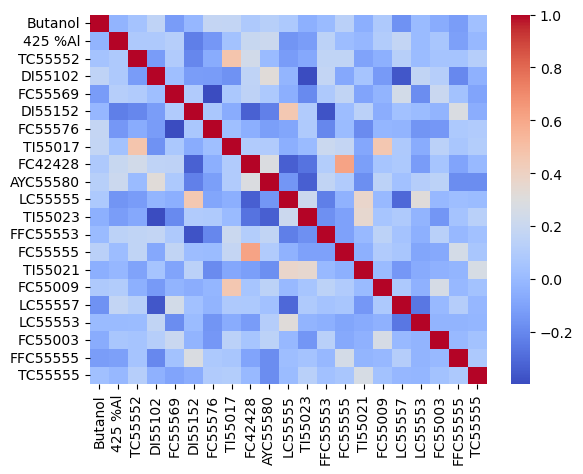

In [8]:
correlation_matrix = df_CDCA.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()
# Calculate and visualize correlations between numeric variables using a correlation matrix or heatmap.
# Identify strong positive/negative correlations.

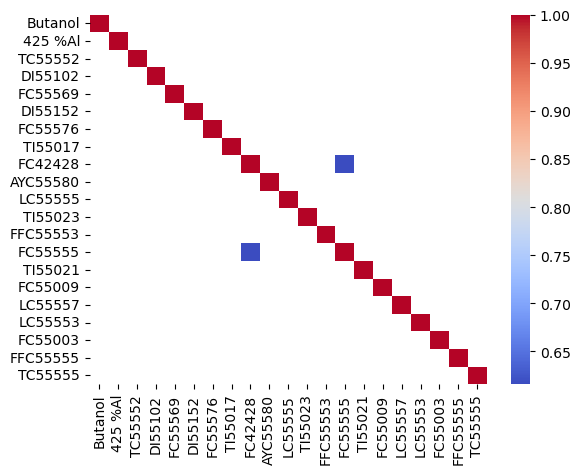

In [9]:
strong_corr = correlation_matrix[abs(correlation_matrix) > 0.6]

sns.heatmap(strong_corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In [10]:

threshold = 0.6
correlation_matrix = df_CDCA.corr(numeric_only=True)
correlation_matrix = correlation_matrix[abs(correlation_matrix) > threshold].fillna(0)



fig = px.imshow(correlation_matrix, 
                color_continuous_scale='balance',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Matrix")

fig.update_xaxes(title_text='Features', side='bottom')
fig.update_layout(width=800, height=800)

fig.show()



In [11]:
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)


In [12]:
# Get indices of upper triangle where correlations are above threshold
indices = np.where((np.abs(correlation_matrix) > threshold) & (upper_triangle))

# Convert these indices to lists
rows, cols = indices[0].tolist(), indices[1].tolist()

# Construct pairs and fetch corresponding values 'DESCRIPTION'


data = []
correlation_id = 1  # Start the unique identifier for each correlation pair

for row, col in zip(rows, cols):
    # Ensure v1 is always lexicographically smaller than v2
    v1, v2 = sorted([correlation_matrix.columns[row], correlation_matrix.columns[col]])
    
    # Skip if this pair has already been processed
    if any(x[1] == v1 and x[2] == v2 for x in data):
        continue

    correlation_value = correlation_matrix.loc[v1, v2]
    
    # Fetch other required values for v1
    importance1 = FScore[FScore['Feature'] == v1]['Importance'].values[0] if not FScore[FScore['Feature'] == v1].empty else "N/A"
    DESCRIPTION1 = TagDesc[TagDesc['ID'] == v1]['DESCRIPTION'].values[0] if not TagDesc[TagDesc['ID'] == v1].empty else "####### UPDATE DESCRIPTION"
    
    # Fetch other required values for v2
    importance2 = FScore[FScore['Feature'] == v2]['Importance'].values[0] if not FScore[FScore['Feature'] == v2].empty else "N/A"
    DESCRIPTION2 = TagDesc[TagDesc['ID'] == v2]['DESCRIPTION'].values[0] if not TagDesc[TagDesc['ID'] == v2].empty else "####### UPDATE DESCRIPTION"
    
    # Append data for v1 and then v2
    data.append(['c' + str(correlation_id) + 'v1', v1, correlation_value, importance1, DESCRIPTION1])
    data.append(['c' + str(correlation_id) + 'v2', v2, correlation_value, importance2, DESCRIPTION2])
    
    correlation_id += 1  # Increment the identifier for the next unique correlation pair

final_df = pd.DataFrame(data, columns=['Pair_ID', 'Variable', 'Correlation', 'Importance', 'DESCRIPTION'])
print(final_df)


  Pair_ID Variable  Correlation  Importance                 DESCRIPTION
0    c1v1  FC42428      0.61606       222.0    STRIPPED ALKOXIDE TO 658
1    c1v2  FC55555      0.61606       183.0  ####### UPDATE DESCRIPTION


In [13]:
sorted_df = final_df.sort_values(by='Correlation', ascending=False)
print(sorted_df)


  Pair_ID Variable  Correlation  Importance                 DESCRIPTION
0    c1v1  FC42428      0.61606       222.0    STRIPPED ALKOXIDE TO 658
1    c1v2  FC55555      0.61606       183.0  ####### UPDATE DESCRIPTION


In [14]:
sorted_df = final_df.sort_values(by='Importance', ascending=False)
sorted_df

,Pair_ID,Variable,Correlation,Importance,DESCRIPTION
0,c1v1,FC42428,0.61606,222.0,STRIPPED ALKOXIDE TO 658
1,c1v2,FC55555,0.61606,183.0,####### UPDATE DESCRIPTION


In [15]:
# # Extract the feature names you want to keep from df_importance
# features_to_keep = df_importance['Feature'].tolist()

# # Filter df_CDFI using these features
# df_CDFI = df_CDFI[features_to_keep]

# # Add back the excluded columns to df_CDFI
# df_CDFI = pd.concat([y, df_CDFI, temp_exclude], axis=1)

In [17]:
# # List of columns to exclude to run XGboost feature selection
# exclude_columns = [
    
#     "TI55017", "FYC55553"
#     #, "FC55152",
#     # , "FC55152", "FC42428",
    
#     ]

# # Create a new DataFrame without the excluded columnsd
# df_CDCA = df_CDCA.drop(columns=exclude_columns)






# Add back the excluded columns to df_CDFI
df_CDCA = pd.concat([df_CDCA, temp_exclude], axis=1)


# If you want to save df_CDFI to a .csv file:
df_CDCA.to_csv('df_CDCA.csv', index=False)

### No CSV Output

Next page starts will all data inputs and uses only those below

LIMS data lables need to be refomatted to input style or they will be left out

In [18]:
df_CDCA.columns
# Data Visualization:

# Create various plots (histograms, bar charts, scatter plots, etc.) to visualize the distribution of data and relationships between variables.
# Use libraries like Matplotlib or Seaborn for data visualization.

Index(['Butanol', '425 %Al', 'TC55552', 'DI55102', 'FC55569', 'DI55152',
       'FC55576', 'TI55017', 'FC42428', 'AYC55580', 'LC55555', 'TI55023',
       'FFC55553', 'FC55555', 'TI55021', 'FC55009', 'LC55557', 'LC55553',
       'FC55003', 'FFC55555', 'TC55555', 'Date', 'Decanol'],
      dtype='object')

In [19]:
num_columns = df_CDCA.shape[1]
print("Number of features:", num_columns)

Number of features: 23
